In [1]:
import random
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import run_analysis
import utils

rms_deviation: 1.9406363605673391
std_difference: 1.939817524432429
             Difference     BSk24
Z     N                          
8.0   8.0     -0.730511  0.031066
      9.0      3.963261  0.033114
      10.0     2.665142  0.048419
      11.0     3.306175  0.048834
      12.0    -1.417643  0.067869
...                 ...       ...
110.0 245.0    0.419454  2.617980
      246.0    1.195966  2.671079
      247.0    0.735087  2.673832
      248.0    1.252564  2.728867
      249.0    1.241823  2.732272

[6425 rows x 2 columns]


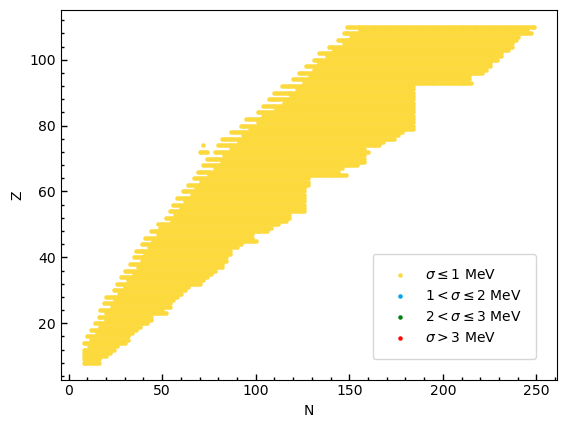

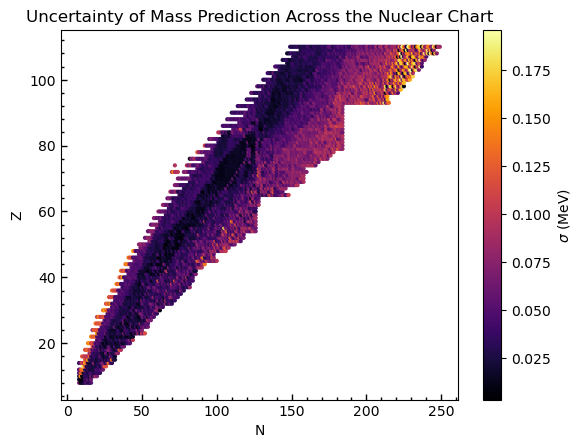

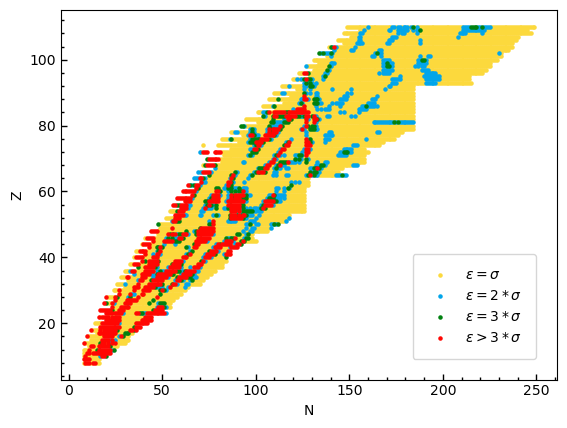

In [2]:
result = ["EXT 24 run, code: 647", "EXT 24 run, code: 1200", "EXT 24 run, code: 10417"]
dir = "data/output/"

run_analysis.main(dir + result[0] + ".dat")

In [3]:
file = dir + result[0] + ".dat"
ds = pd.read_csv(file, sep=";")
db = pd.read_csv("data/input/bsk24_mass_table.csv", sep=";")

m_bsk24: 7231    406.73
Name: m, dtype: float64


/mnt/Data/2_Area_Learn/Master Degree/2 Area_Courses/Master Thesis/1_Project/4_BSk24_Emu/run_analysis.py:117: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


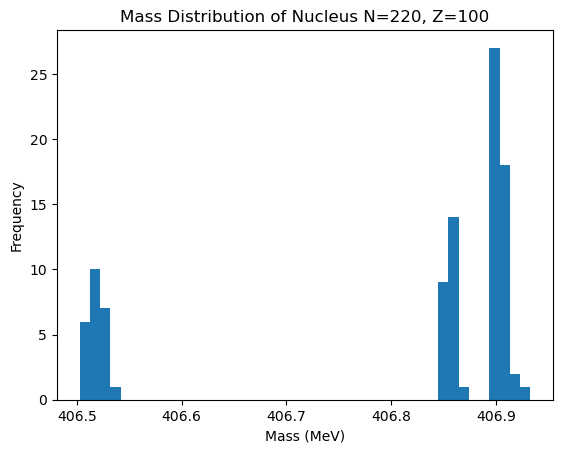

In [ ]:
ni = 220
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk}")
run_analysis.plot_histogram_nucleus(ni, zi, ds, resolution=0.01)

rms_deviation: 1.7262060638094854
std_difference: 1.7243206504778994


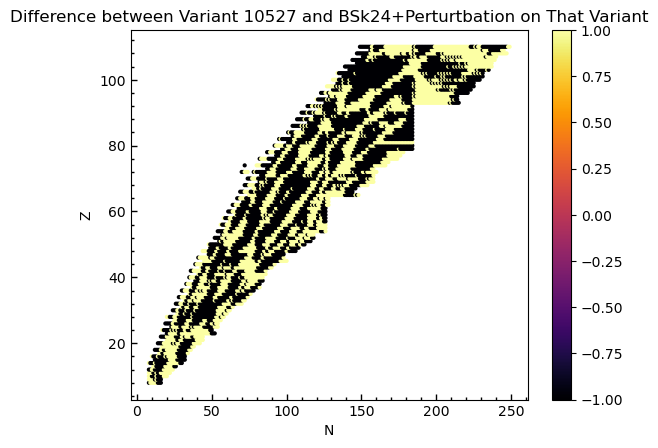

rms_deviation: 1.6644750148388667
std_difference: 1.6640797367127642


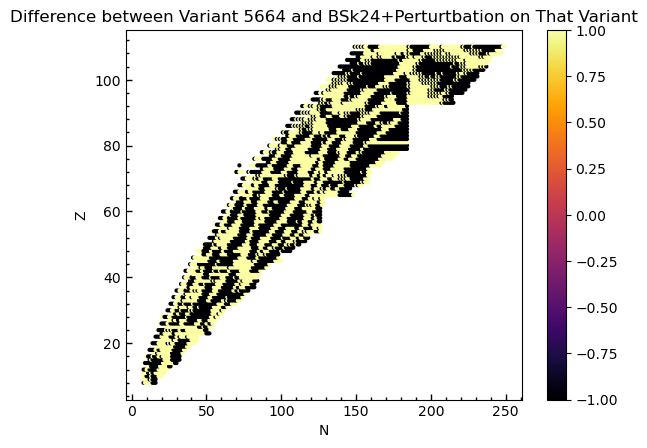

rms_deviation: 1.6055738449450168
std_difference: 1.6051834944375618


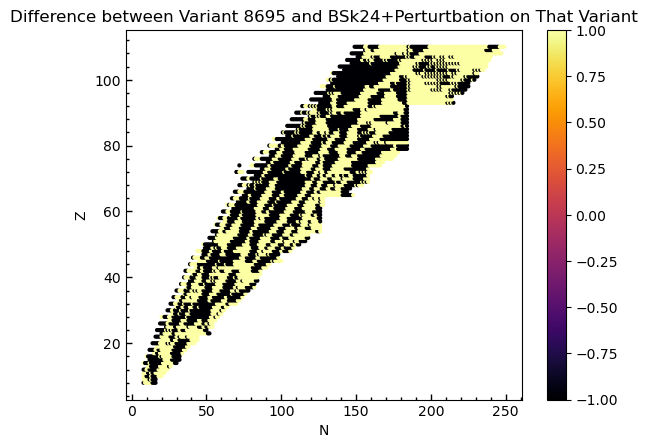

rms_deviation: 1.5466805884606187
std_difference: 1.529678197042482


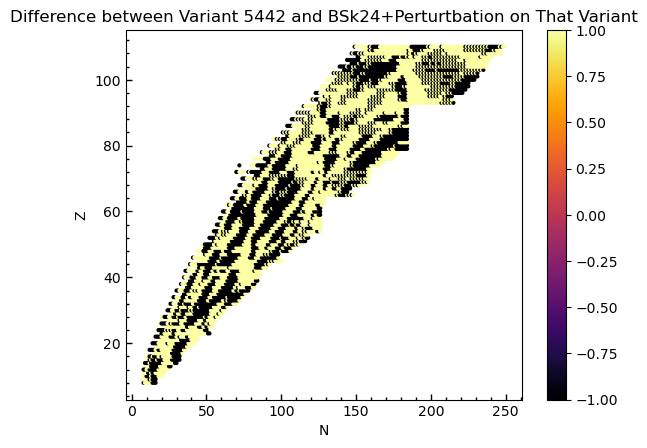

rms_deviation: 1.9608532587196417
std_difference: 1.8348732266672576


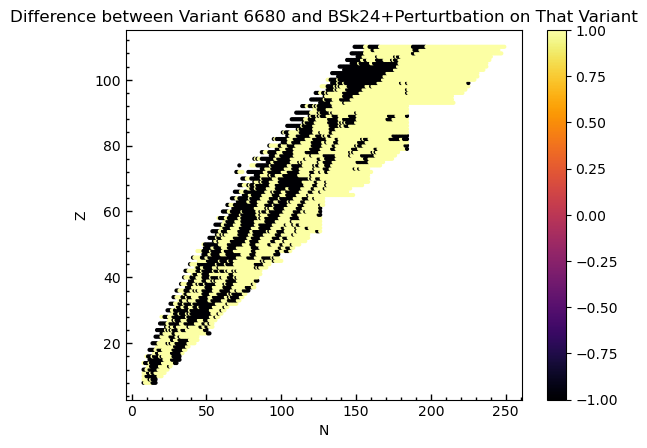

In [34]:
# Analyse the deviation of one variant
import glob

file_pattern = "data/output/Variant_*"

result_one = glob.glob(file_pattern)

for aa in range(len(result_one)):
    analysed = aa
    analysed_variant = result_one[analysed][20:-4]
    dat = pd.read_csv(result_one[analysed], sep=";")
    dat["sign"] = dat["Difference"].apply(lambda x: -1 if x < 0 else 1)

    rms_dev = np.sqrt((dat["Difference"] ** 2).mean())
    std_diff = dat["Difference"].std()

    fig, ax = plt.subplots()
    scatter = ax.scatter(dat["N"], dat["Z"], c=dat["sign"], s=4, cmap="inferno")
    colourbar = fig.colorbar(scatter, ax=ax)
    ax.set_title(
        f"Difference between Variant {analysed_variant} and BSk24+Perturtbation on That Variant"
    )
    ax.set_xlabel("N")
    ax.set_ylabel("Z")
    utils.plot.set_tick(ax)

    print(f"rms_deviation: {rms_dev}")
    print(f"std_difference: {std_diff}")
    plt.show()

rms_deviation: 6.6511093794113725
std_difference: 5.90184798681107
             Difference     BSk24
Z     N                          
8.0   8.0     -0.383780  0.034929
      9.0      3.173398  0.036989
      10.0     3.022354  0.048300
      11.0     6.593480  0.068892
      12.0     5.805333  0.059346
...                 ...       ...
110.0 245.0  -10.060003  2.807452
      246.0   -8.928142  2.858407
      247.0   -7.568252  2.864776
      248.0   -6.045213  2.921869
      249.0   -3.285790  2.926984

[6425 rows x 2 columns]


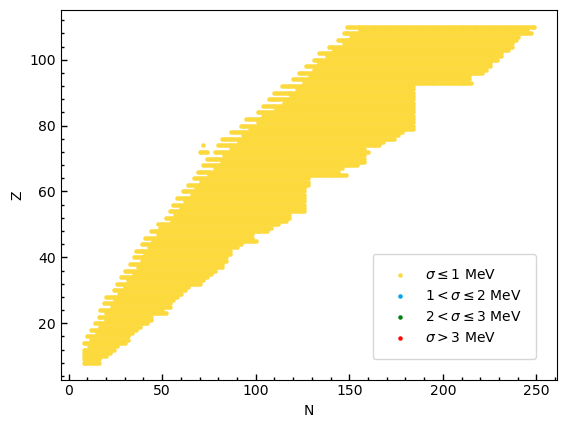

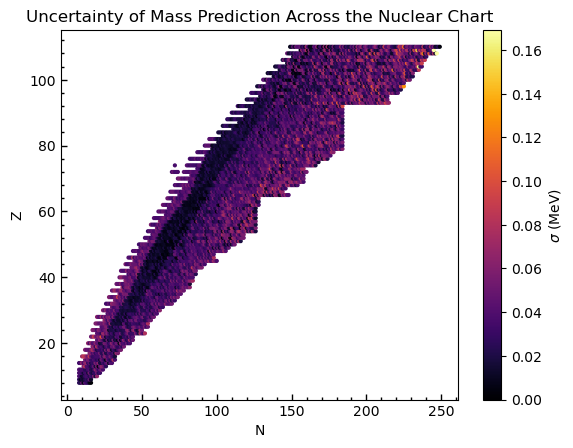

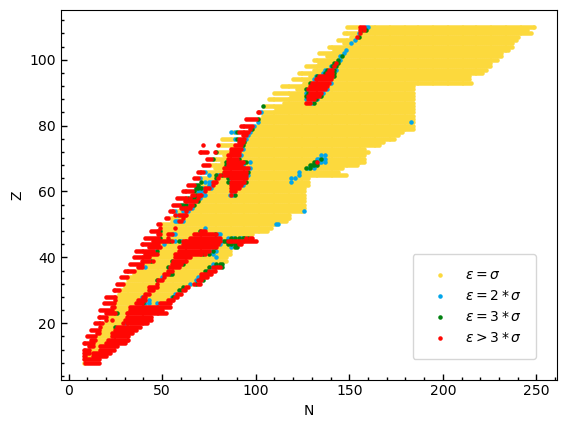

In [54]:
ff = "data/output/EXT 24 run custom loss, code: 369.dat"
ssd = pd.read_csv(ff, sep=";")
run_analysis.main(ff)

m_bsk24: 83.2


ValueError: cannot convert float NaN to integer

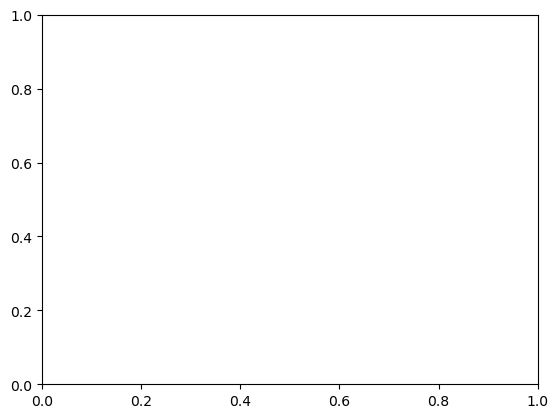

In [70]:
ni = 126
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk.iloc[0]}")

run_analysis.plot_histogram_nucleus(ni, zi, ssd, resolution=0.05)